In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [3]:
cities_df = pd.DataFrame(cities)

In [4]:
name = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
temp_max = []
wind_speed = []

In [5]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).
params = {"appid": api_key,
         "units": "Imperial"}

print("Beginning Data Retrieval")
print("----------------------------------------")

for index, row in cities_df.iterrows():
    try:
        index <= 500
        base_url = "http://api.openweathermap.org/data/2.5/weather?"
        query_city = row[0]
        params['query_city'] = query_city

        print(f"Processing Record {index} of Set 1 | {query_city}")
    
        url = base_url + "q=" + query_city + "&appid=" + api_key 
        
        response = requests.get(url, params=params).json()
        
        name.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
                
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
print("----------------------------------------")
print("Data Retrieval Complete")
print("----------------------------------------")
    


Beginning Data Retrieval
----------------------------------------
Processing Record 0 of Set 1 | kodiak
Processing Record 1 of Set 1 | thinadhoo
Processing Record 2 of Set 1 | asau
City not found. Skipping...
Processing Record 3 of Set 1 | limbang
Processing Record 4 of Set 1 | mount isa
Processing Record 5 of Set 1 | aden
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | buraydah
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | vostok
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | port hedland
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | khowst
City not found. Skipping...
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | idlib
Processing Record 21 of Set 1 | mil

Processing Record 185 of Set 1 | two hills
Processing Record 186 of Set 1 | pevek
Processing Record 187 of Set 1 | saint george
Processing Record 188 of Set 1 | santa rosa
Processing Record 189 of Set 1 | ippy
Processing Record 190 of Set 1 | palmer
Processing Record 191 of Set 1 | prince rupert
Processing Record 192 of Set 1 | guatire
Processing Record 193 of Set 1 | innisfail
Processing Record 194 of Set 1 | port augusta
Processing Record 195 of Set 1 | port blair
Processing Record 196 of Set 1 | oriximina
Processing Record 197 of Set 1 | werneck
Processing Record 198 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 199 of Set 1 | warqla
City not found. Skipping...
Processing Record 200 of Set 1 | codrington
Processing Record 201 of Set 1 | georgetown
Processing Record 202 of Set 1 | cidreira
Processing Record 203 of Set 1 | morro bay
Processing Record 204 of Set 1 | pafos
City not found. Skipping...
Processing Record 205 of Set 1 | burnie
Processing Record 206 

Processing Record 363 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 364 of Set 1 | mattru
Processing Record 365 of Set 1 | balkhash
Processing Record 366 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 367 of Set 1 | amapa
Processing Record 368 of Set 1 | hunza
City not found. Skipping...
Processing Record 369 of Set 1 | shaunavon
Processing Record 370 of Set 1 | fare
Processing Record 371 of Set 1 | cockburn town
Processing Record 372 of Set 1 | tuatapere
Processing Record 373 of Set 1 | nevel
Processing Record 374 of Set 1 | milford
Processing Record 375 of Set 1 | nome
Processing Record 376 of Set 1 | dali
Processing Record 377 of Set 1 | gamba
Processing Record 378 of Set 1 | komsomolskiy
Processing Record 379 of Set 1 | homer
Processing Record 380 of Set 1 | carndonagh
Processing Record 381 of Set 1 | kardamaina
Processing Record 382 of Set 1 | puerto carreno
Processing Record 383 of Set 1 | port hawkesbury
Processing Record 384 of Set 1 

Processing Record 549 of Set 1 | kanniyakumari
Processing Record 550 of Set 1 | mana
Processing Record 551 of Set 1 | luba
Processing Record 552 of Set 1 | macaboboni
City not found. Skipping...
Processing Record 553 of Set 1 | najran
Processing Record 554 of Set 1 | hihifo
City not found. Skipping...
Processing Record 555 of Set 1 | jiexiu
Processing Record 556 of Set 1 | mayo
Processing Record 557 of Set 1 | whitehorse
Processing Record 558 of Set 1 | baracoa
Processing Record 559 of Set 1 | banda aceh
Processing Record 560 of Set 1 | granville
Processing Record 561 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 562 of Set 1 | flinders
Processing Record 563 of Set 1 | kingsport
Processing Record 564 of Set 1 | langham
Processing Record 565 of Set 1 | tabas
Processing Record 566 of Set 1 | port moresby
Processing Record 567 of Set 1 | ocosingo
Processing Record 568 of Set 1 | winona
Processing Record 569 of Set 1 | mogzon
Processing Record 570 of Set 1 | barranca
Processing Re

In [6]:
#Convert Raw Data to DataFrame
#Display the DataFrame
weather_data = {"City": name, "Cloudiness": clouds, "Country": country, "Humidity": humidity, "Lat": lat, "Lng": lng, "Max Temp": temp_max, "Wind Speed": wind_speed }
weather_data = pd.DataFrame(weather_data)
weather_data.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kodiak,75,US,83,39.95,-94.76,81.00,6.93
1,Thinadhoo,20,MV,77,0.53,72.93,82.73,11.72
2,Limbang,75,BN,70,4.75,115.01,87.80,4.70
3,Mount Isa,4,AU,13,-20.73,139.49,84.20,11.41
4,Aden,0,YE,71,12.79,45.03,86.94,10.33


In [7]:
#Export the city data into a .csv.
weather_data.to_csv("Weather_Output.csv")

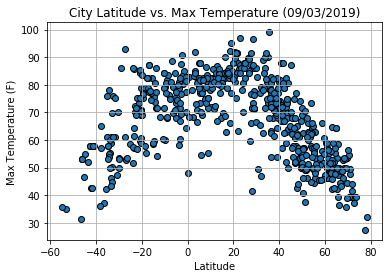

In [8]:
#Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.
#Latitude vs. Temperature Plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%m/%d/%Y')})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_max_temp.png")
plt.show()

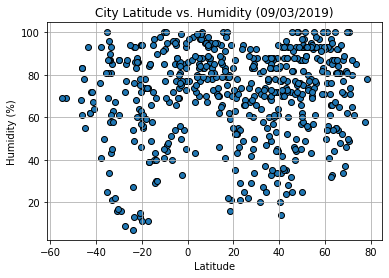

In [9]:
#Latitude vs. Humidity Plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({time.strftime('%m/%d/%Y')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_humidity.png")
plt.show()

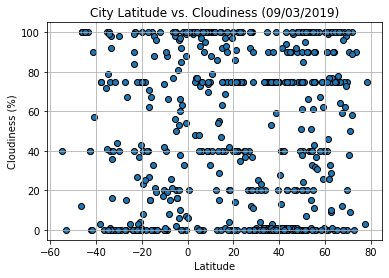

In [10]:
#Latitude vs. Cloudiness Plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%m/%d/%Y')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

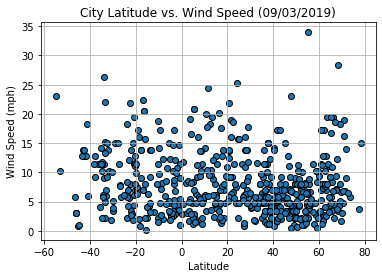

In [11]:
#Latitude vs. Wind Speed Plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%m/%d/%Y')})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_wind_speed.png")
plt.show()